## Credit Card Fraud Detection - UPGRAD Capstone Project

**By Nitin Madhavan**

### Problem Statement
The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

In this project, you will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group. 

### Business problem overview
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 


In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import machine learning and stats libraries:
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, f1_score, recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import  PowerTransformer, scale


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

#### Load Data

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Explore Data

In [4]:
# Check Row and Column Count
print(df.shape)
# Check distribution of data:
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Check Column Names, Types, Counts, Null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(f"Normal Transactions: {normal_share}")
print(f"Fraud Transactions : {fraud_share}")

Normal Transactions: 99.82725143693798
Fraud Transactions : 0.1727485630620034


In [6]:
def create_plots():
    # Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
    plt.figure(figsize=(10,5))
    sns.countplot(df['Class'])
    plt.title("Class Count", fontsize=15)
    plt.xlabel("Record counts by class", fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.show()
    
    # Plot Correlation Matrix
    cor = df.corr()
    plt.figure(figsize=(24,18))
    sns.heatmap(cor, cmap="YlGnBu", annot=True)
    plt.show()
 
    # Create a scatter plot to observe the distribution of classes with time
    plt.figure(figsize=(10,5))
    cmap = sns.color_palette('Set1')
    sns.scatterplot(x=df['Time'], y='Class', palette=cmap, data=df)
    plt.xlabel('Time', size=15)
    plt.ylabel('Class', size=15)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12) 
    plt.title('Distribution of Classes with Time', size=18, y=1.05)
    plt.show()
    
    # Create a scatter plot to observe the distribution of classes with Amount
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df['Amount'], y='Class', palette=cmap, data=df)
    plt.xlabel('Time', size=15)
    plt.ylabel('Class', size=15)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12) 
    plt.title('Distribution of Classes with Amount', size=18, y=1.05)
    plt.show()

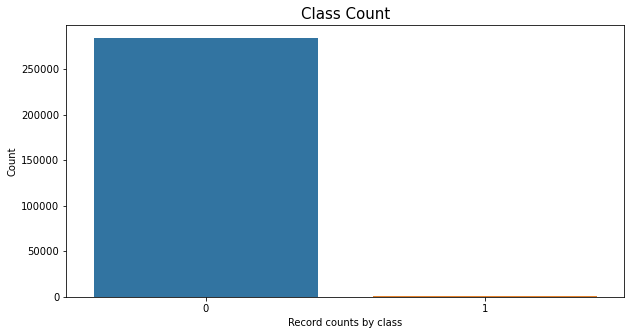

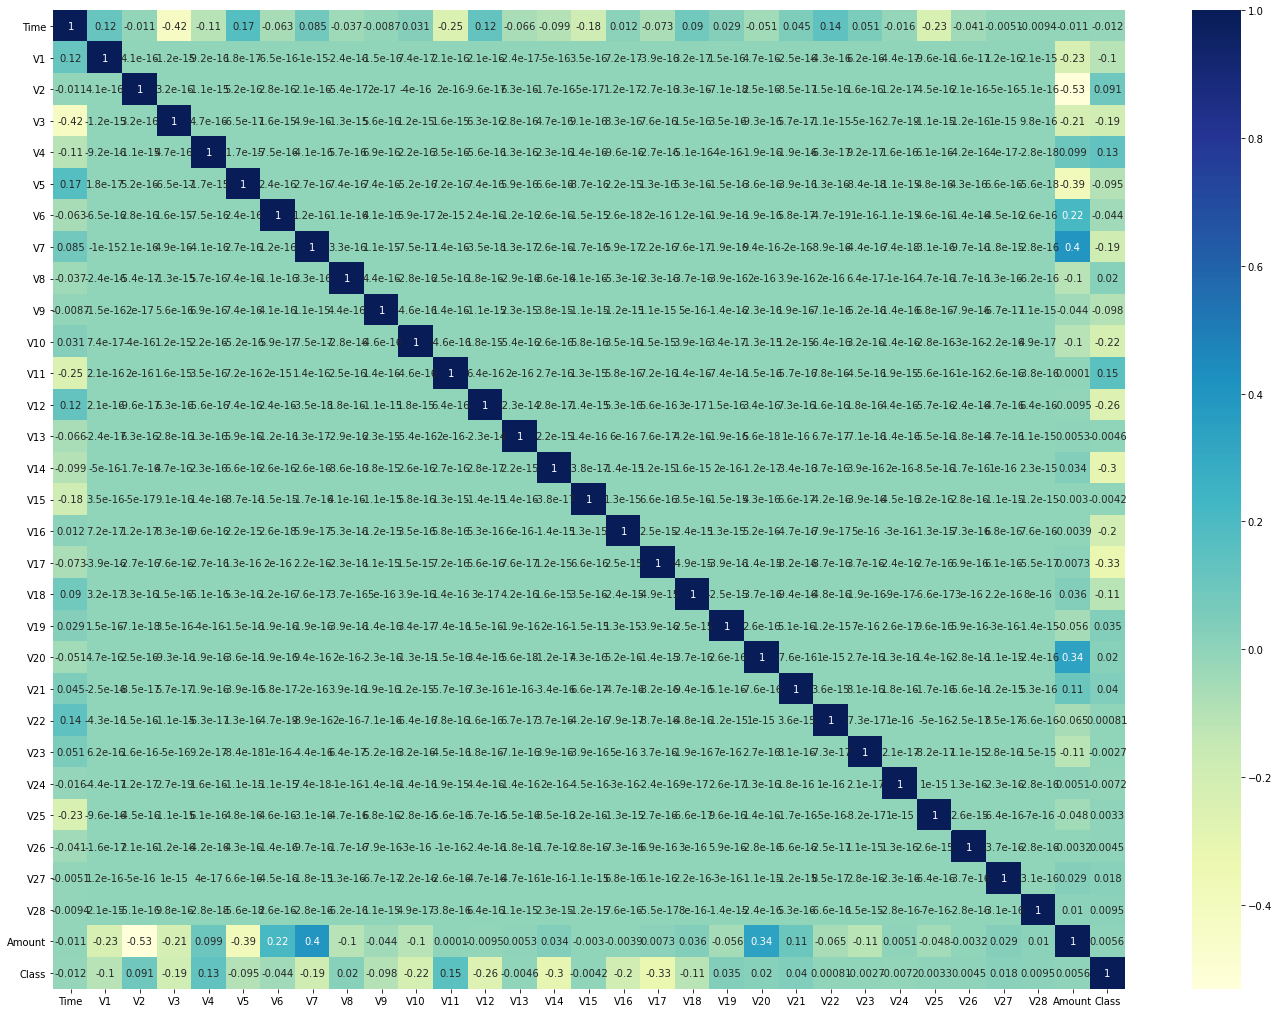

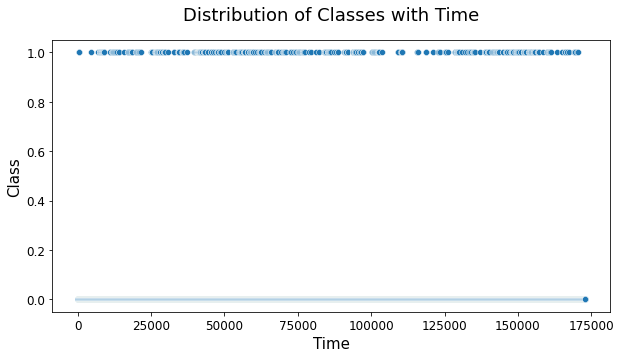

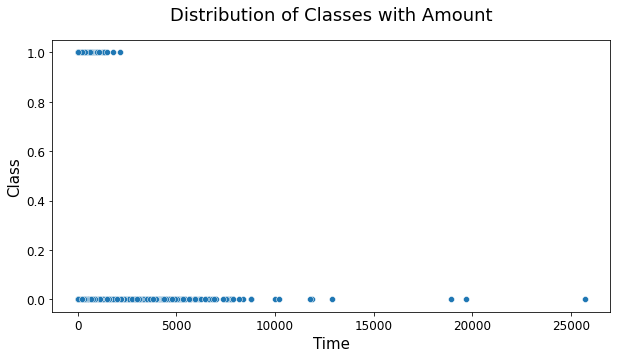

In [7]:
create_plots()

#### Drop Unnecessary Columns

In [8]:
# Drop unnecessary columns
df = df.drop('Time', axis = 1)

### Splitting the data into train & test data

In [8]:
y= df['Class']
X = df.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [9]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of All Variables

In [10]:
normal_records = df.Class == 0
fraud_records = df.Class == 1
cols = list(X.columns.values)

def plot_column_dist(df_X):
    plt.figure(figsize=(20, 60))
    for n, col in enumerate(cols):
        plt.subplot(10,3,n+1)
        sns.distplot(df_X[col][normal_records], color='blue')
        sns.distplot(df_X[col][fraud_records], color='red')
        plt.title(col, fontsize=15)
    plt.show()

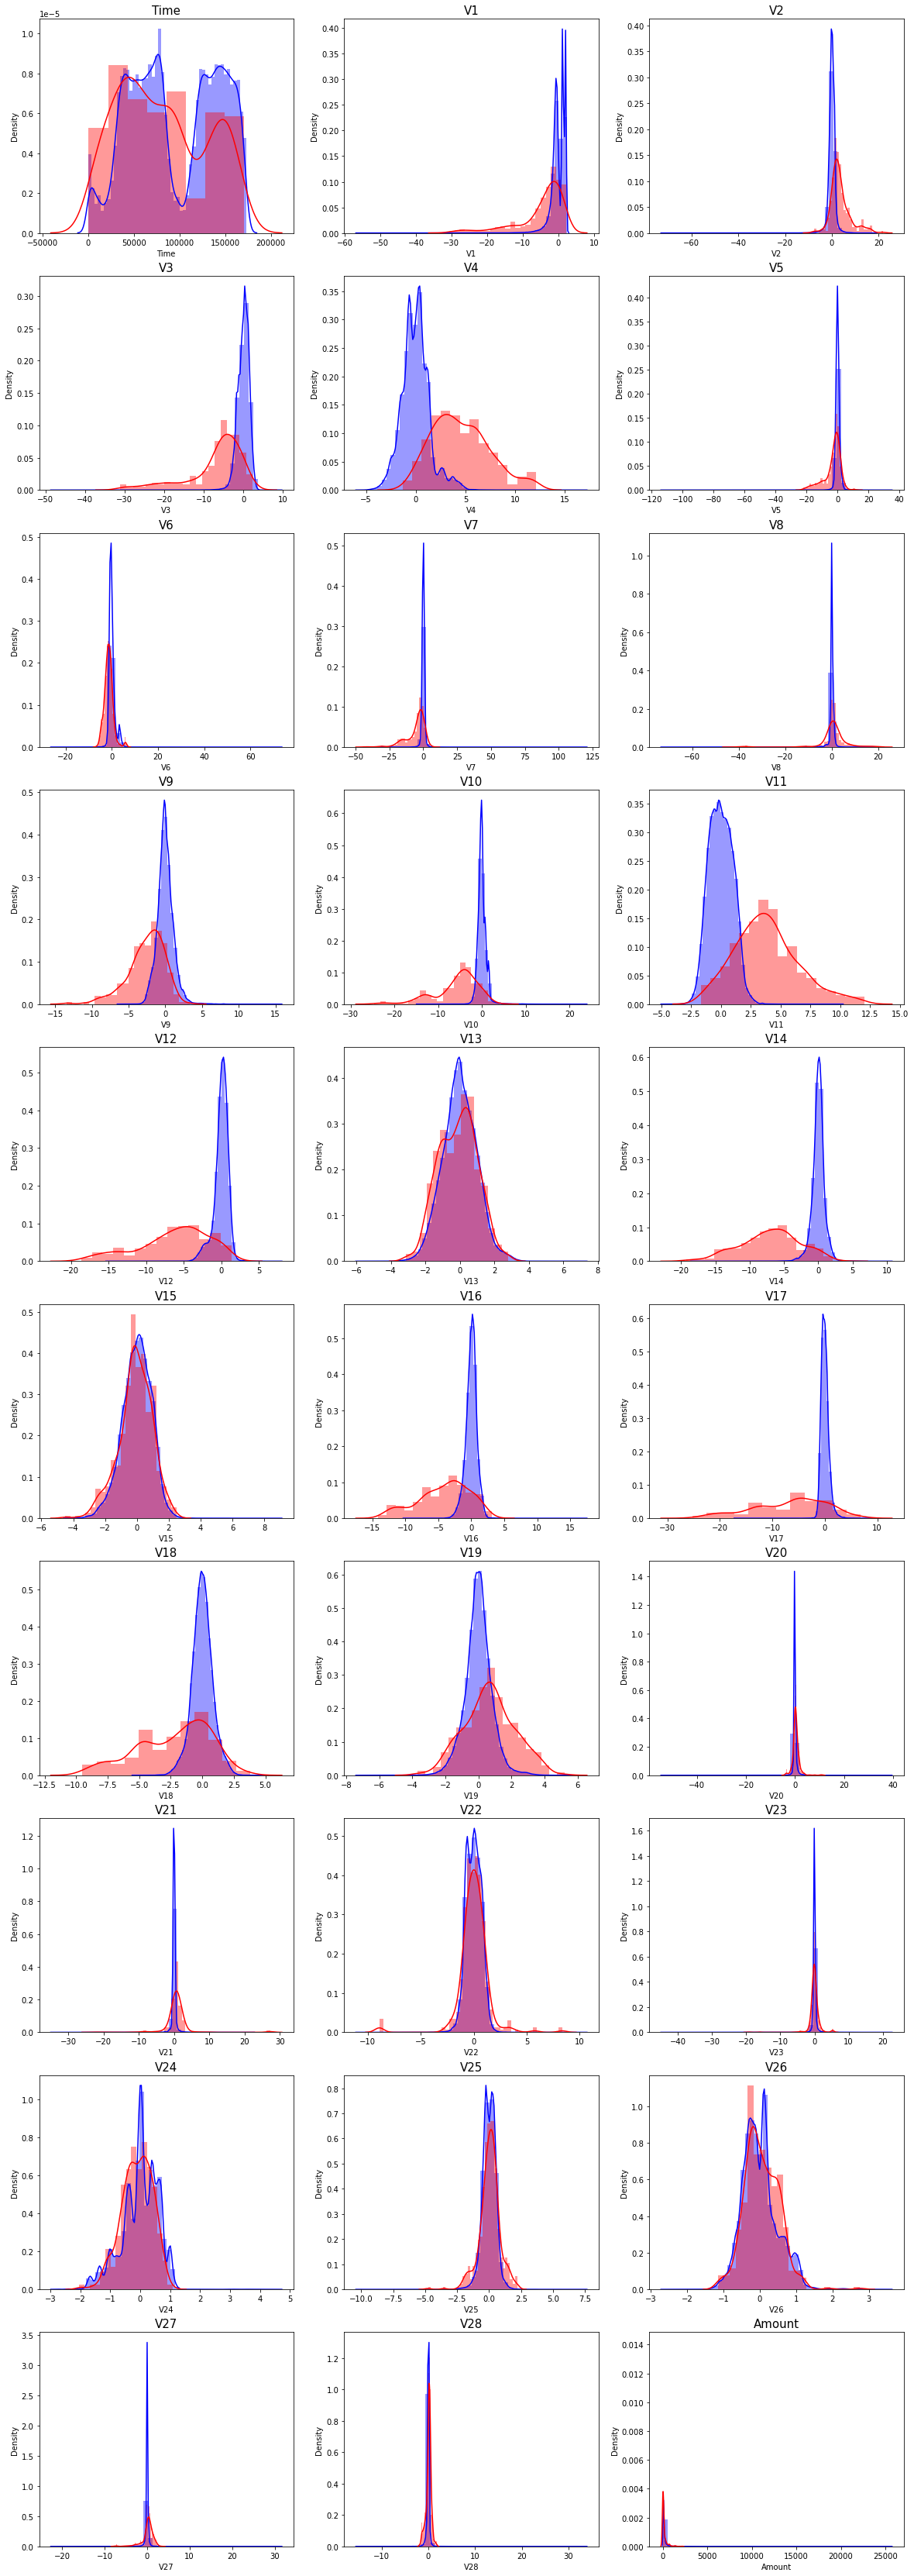

In [11]:
# plot the histogram of a variable from the dataset to see the skewness
plot_column_dist(X)

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [13]:
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train = pt.transform(X_train)    ## Then apply on all data
X_test = pt.transform(X_test)

X_train_df = pd.DataFrame(data=X_train, columns=cols)
X_test_df = pd.DataFrame(data=X_test, columns=cols)

### Plotting the distribution of All Variables after Removing Skewness - Train Dataset

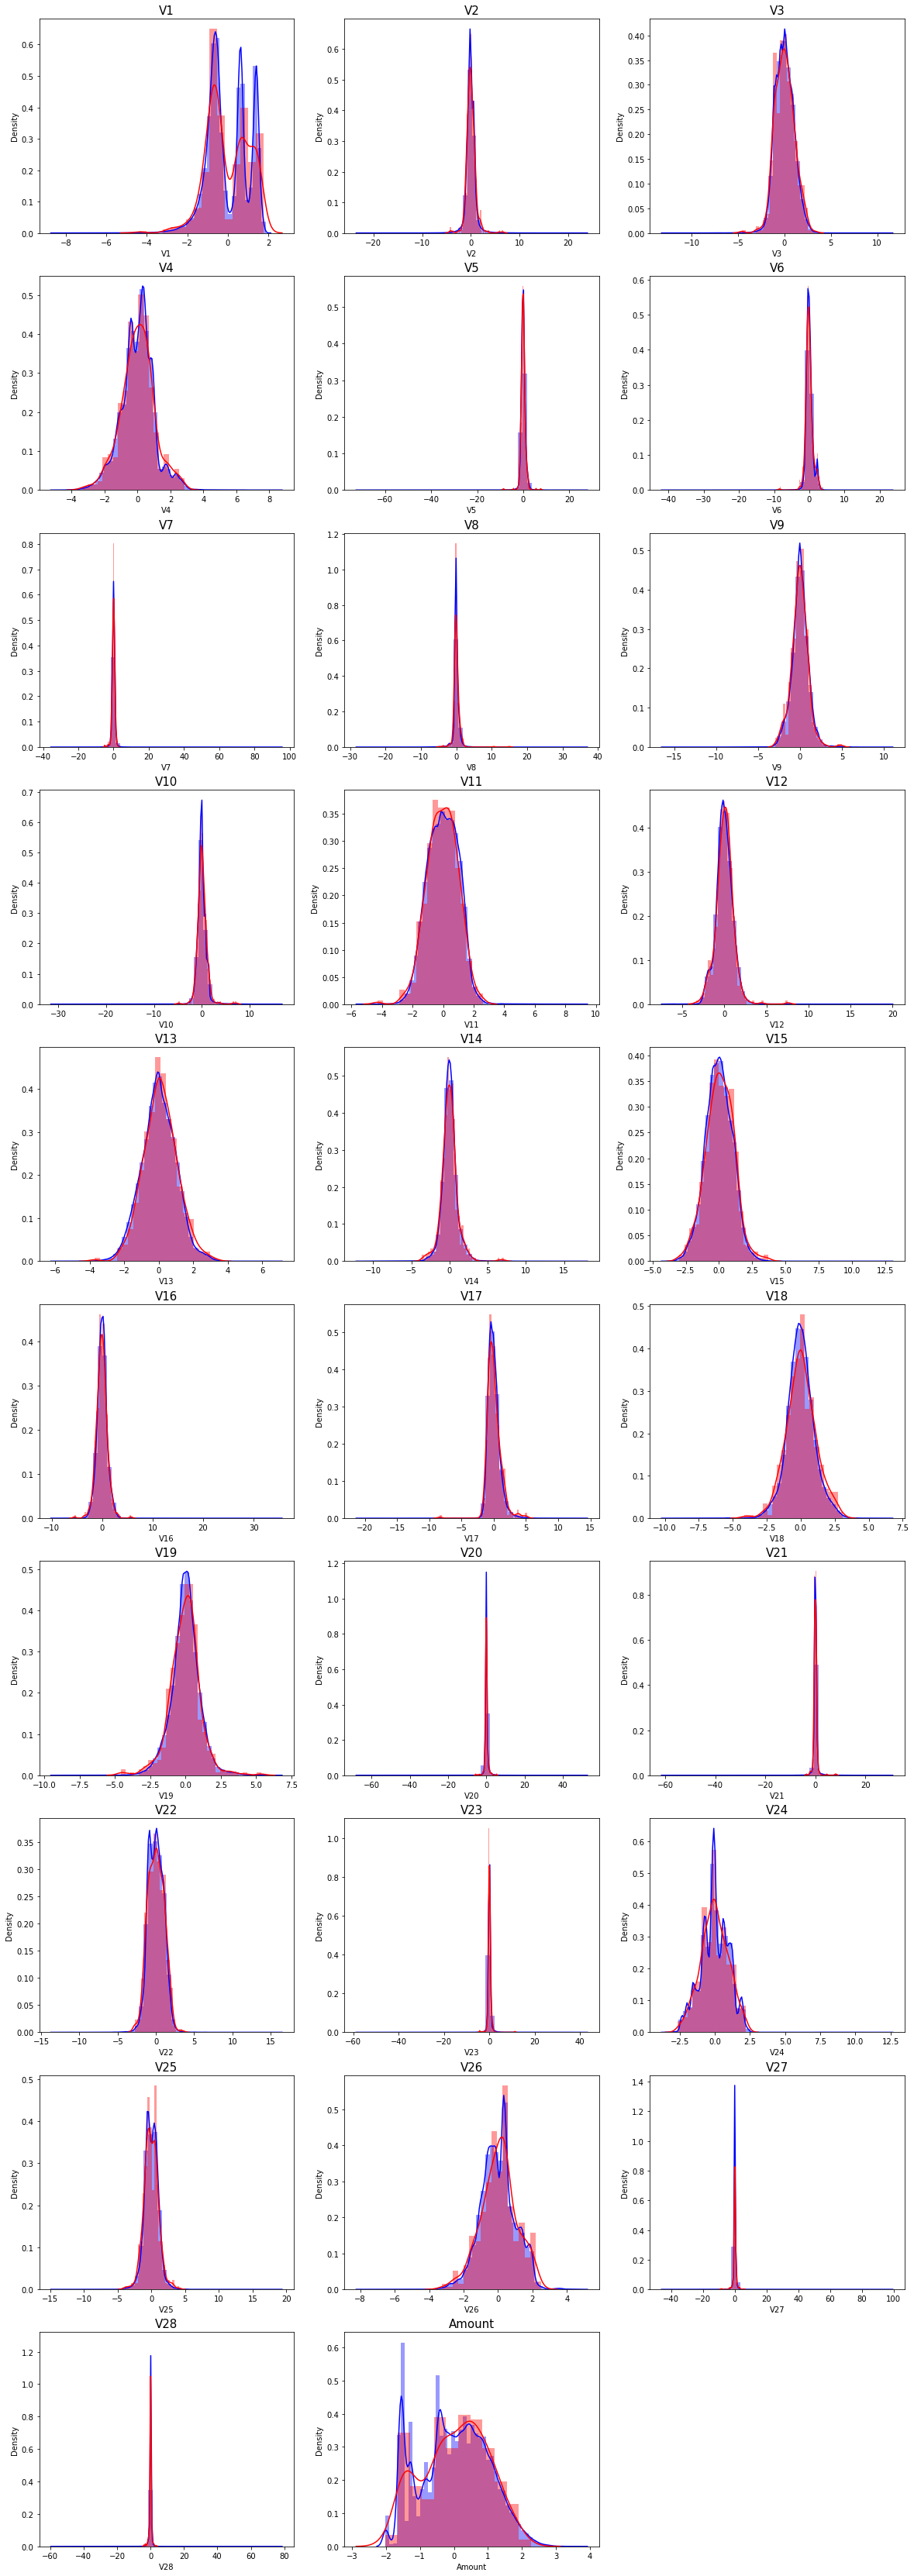

In [14]:
# plot the histogram of a variable from the dataset again to see the result 
plot_column_dist(X_train_df)

### Plotting the distribution of All Variables after Removing Skewness - Test Dataset

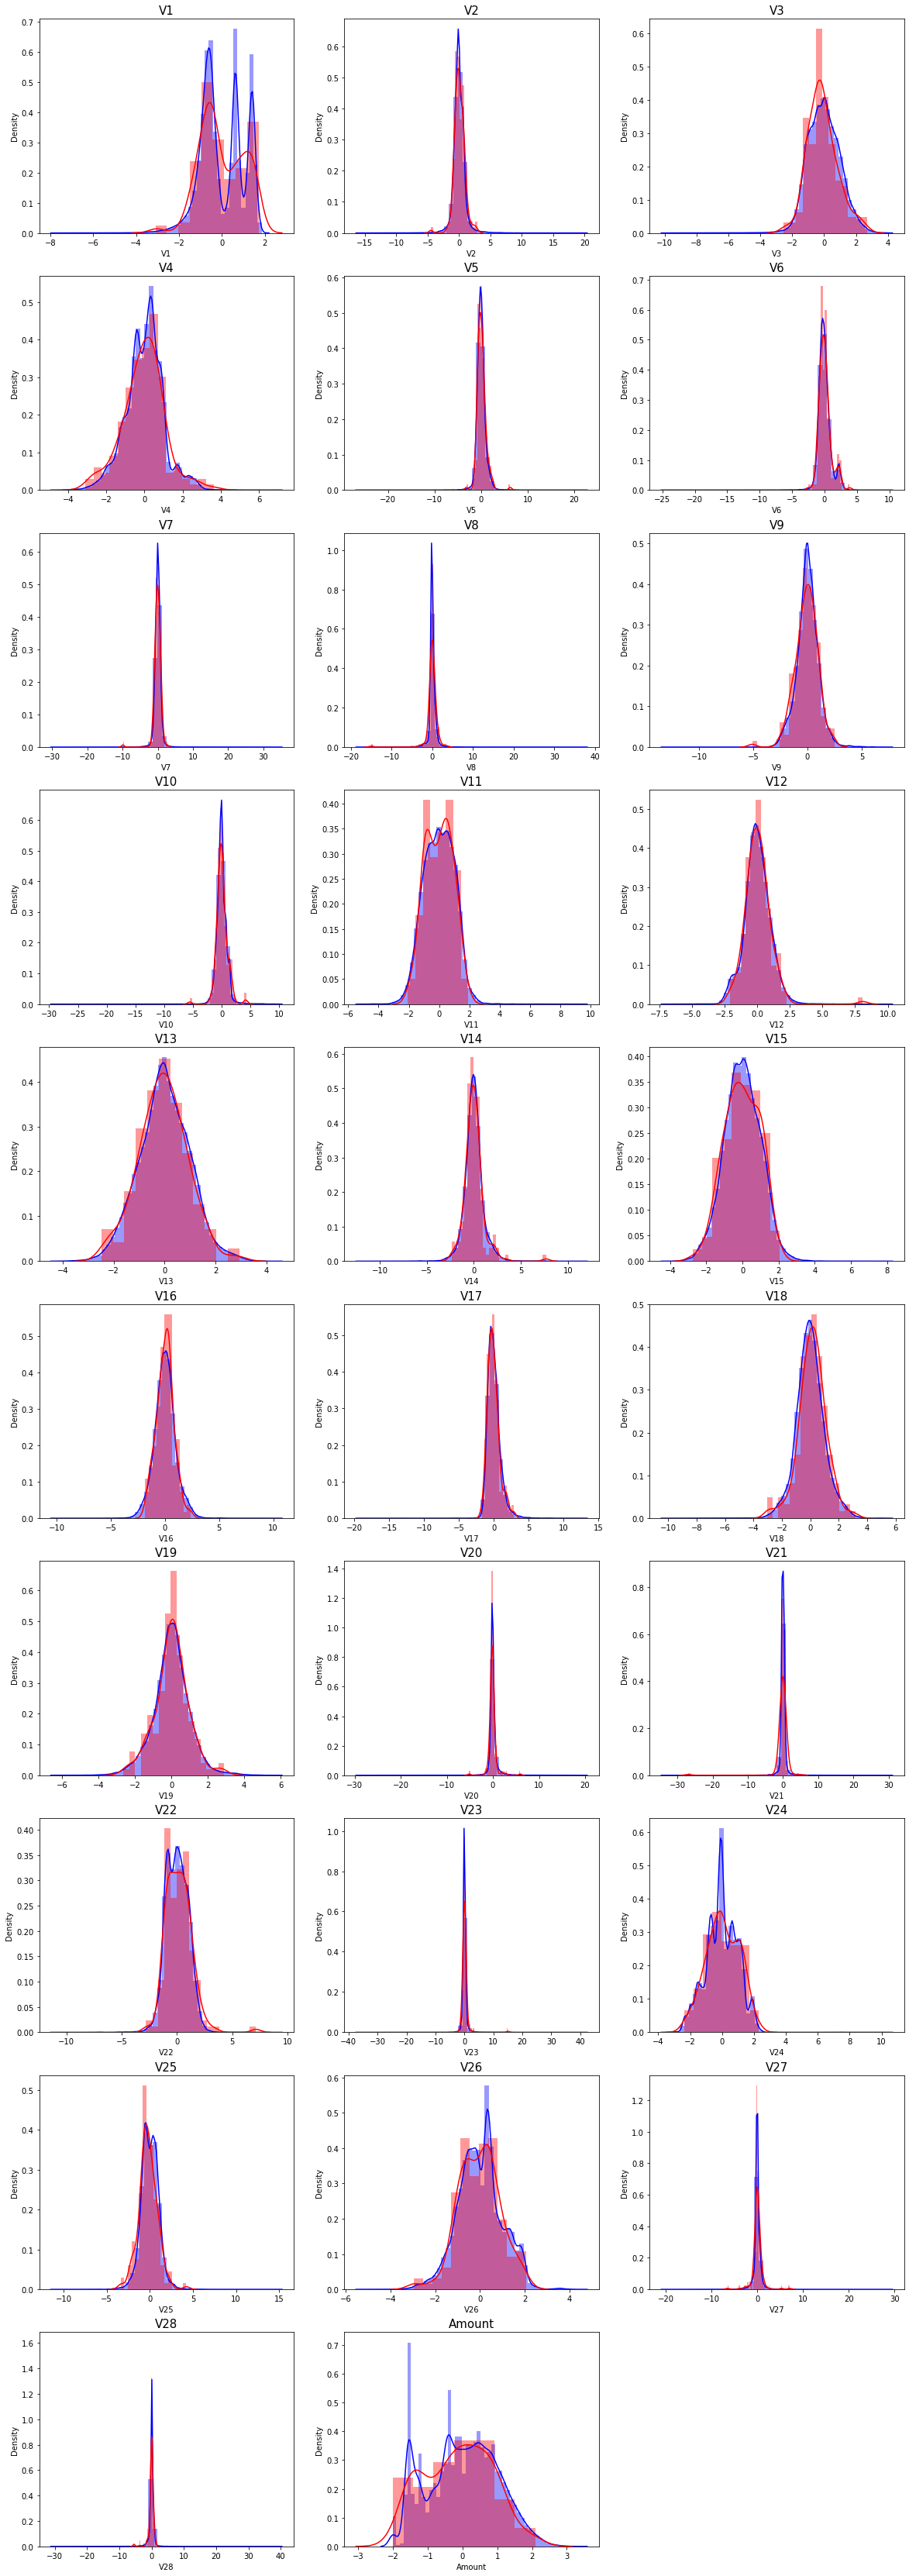

In [15]:
# plot the histogram of a variable from the test dataset again to see the result 
plot_column_dist(X_test_df)

## Model Building
- Build different models on the imbalanced dataset and see the result

### Helper Functions

In [27]:
# Dictionary to Store Model Performance Results
overall_results = []

def plot_roc(fpr, tpr, auc_score):
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred, y_test_pred_proba):

    f1score = f1_score(y_test, y_pred)
    print(f"F1 Score: {round(f1score*100, 2)}%") 
    cl_report = classification_report(y_test, y_pred, output_dict =True)
    recall = cl_report['1']['recall']
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score(y_test, y_test_pred_proba)

    print(f"AUC Score: {round(auc_score*100, 2)}%")
    plot_roc(fpr, tpr, auc_score)
    
    result = [f1score, auc_score, recall]
    
    return result

## Model 1 - Logistic Regression Model

#### Cross Validation with K-Fold

In [28]:
def cv_logistic_regression(X_train, y_train):
    # Logistic Regression parameters for K-fold cross vaidation
    params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
    folds = KFold(n_splits=5, shuffle=True, random_state=4)

    #perform cross validation
    model_cv = GridSearchCV(estimator = LogisticRegression(),
                            param_grid = params, 
                            scoring = 'recall', 
                            cv = folds, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True) 
    #perform hyperparameter tuning
    model_cv.fit(X_train, y_train)
    #print the evaluation result by choosing a evaluation metric
    print('Best ROC AUC score: ', model_cv.best_score_)
    #print the optimum value of hyperparameters
    print('Best hyperparameters: ', model_cv.best_params_)
    
    cv_results = pd.DataFrame(model_cv.cv_results_)
    
    #plot of C versus train and validation scores
    plt.figure(figsize=(8, 6))
    plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
    plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
    plt.xlabel('C')
    plt.ylabel('sensitivity')
    plt.legend(['test result', 'train result'], loc='upper left')
    plt.xscale('log')
    plt.show()
    return model_cv.best_params_

#### Fit , Predict and Evaluate Model

In [29]:
def model_logistic_regression(X_train, y_train):
    best_params = cv_logistic_regression(X_train, y_train)
    
    # Instantiating the model with best C
    log_reg_imb_model = LogisticRegression(C=best_params.get('C'))
    
    # Fitting the model on train dataset
    log_reg_imb_model.fit(X_train, y_train)
    
    # Predictions on the train set
    print("-" * 40)
    print(f"{'-'*10} Predict on Train Set {'-'*10}")
    print("-" * 40)
    y_train_pred = log_reg_imb_model.predict(X_train)
    
    # Predicted probability
    y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

    result_train = display_scores(y_train, y_train_pred, y_train_pred_proba)
    
    # Making prediction on the test set
    print("-" * 45)
    print(f"{'-'*10} Predict on Test Set {'-'*10}")
    print("-" * 45)
    y_test_pred = log_reg_imb_model.predict(X_test)

    # Predicted probability
    y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

    result_test = display_scores(y_test, y_test_pred, y_test_pred_proba)
    
    print(f"{'='*42}\n{'='*15} Model Summary {'='*15}\n{'='*42}")
    print(f"---------\nTrain Set:\n---------")
    print(f"F1 Score - {round(result_train[0]*100, 2)}%")
    print(f"AUC Score - {round(result_train[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_train[2]*100, 2)}% ")
    print(f"---------\nTest Set:\n---------")
    print(f"F1 Score - {round(result_test[0]*100, 2)}%")
    print(f"AUC Score - {round(result_test[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_test[2]*100, 2)}% ")
    result = {'XGBoost': {'Train':result_train, 'Test': result_test}}
    
    return log_reg_imb_model, result_train, result_test

### Similarly explore other algorithms by building models like:
- SVM
- XGBoost

## Model 2 - Decision Tree

#### Cross Validation with K-Fold

In [30]:
def cv_dt(X_train, y_train):
    # Hyperparameters for Grid Search
    params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
  
    dt_classifier = DecisionTreeClassifier()  
    
    folds = 2

    #perform cross validation
    model_cv = GridSearchCV(estimator = dt_classifier, 
                            param_grid = params , 
                            scoring = 'recall', 
                            cv = folds,
                            n_jobs=-1,
                            verbose=1)

    # fit the model
    model_cv.fit(X_train, y_train)
    #print the evaluation result by choosing a evaluation metric
    print('Best ROC AUC score: ', model_cv.best_score_)
    #print the optimum value of hyperparameters
    print('Best hyperparameters: ', model_cv.best_params_)
    print('Best Estimator: ', model_cv.best_estimator_)

    return model_cv.best_params_



#### Fit , Predict and Evaluate Model

In [31]:
def model_dt(X_train, y_train):
    best_params = cv_dt(X_train, y_train)
    # fit model on training data
    imb_model = DecisionTreeClassifier(**best_params)
    
    # Fitting the model on train dataset
    imb_model.fit(X_train, y_train)
    
    # Predictions on the train set
    print("-" * 40)
    print(f"{'-'*10} Predict on Train Set {'-'*10}")
    print("-" * 40)
    y_train_pred = imb_model.predict(X_train)
    
    # Predicted probability
    y_train_pred_proba = imb_model.predict_proba(X_train)[:,1]

    # Plot the ROC curve
    result_train = display_scores(y_train, y_train_pred, y_train_pred_proba)
    
    # Making prediction on the test set
    print("-" * 45)
    print(f"{'-'*10} Predict on Test Set {'-'*10}")
    print("-" * 45)
    y_test_pred = imb_model.predict(X_test)

    # Predicted probability
    y_test_pred_proba = imb_model.predict_proba(X_test)[:,1]

    # Plot the ROC curve
    result_test = display_scores(y_test, y_test_pred, y_test_pred_proba)
    
    print(f"{'='*42}\n{'='*15} Model Summary {'='*15}\n{'='*42}")
    print(f"---------\nTrain Set:\n---------")
    print(f"F1 Score - {round(result_train[0]*100, 2)}%")
    print(f"AUC Score - {round(result_train[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_train[2]*100, 2)}% ")
    print(f"---------\nTest Set:\n---------")
    print(f"F1 Score - {round(result_test[0]*100, 2)}%")
    print(f"AUC Score - {round(result_test[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_test[2]*100, 2)}% ")
    result = {'XGBoost': {'Train':result_train, 'Test': result_test}}    
    result = {'SVM': {'Train':result_train, 'Test': result_test}}

    return imb_model, result_train, result_test

## Model 3 - Random Forest Model

#### Cross Validation with K-Fold

In [32]:
def cv_randomforest(X_train, y_train):
    # Hyperparameters for Grid Search
    params = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             } 
  
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
    
    folds = 2

    #perform cross validation
    model_cv = GridSearchCV(estimator = RF_model,
                            param_grid= params,
                            scoring= 'recall', 
                            cv = folds, 
                            n_jobs=-1,
                            verbose = 1,
                            return_train_score=True)

    # fit the model
    model_cv.fit(X_train, y_train)
    #print the evaluation result by choosing a evaluation metric
    print('Best ROC AUC score: ', model_cv.best_score_)
    #print the optimum value of hyperparameters
    print('Best hyperparameters: ', model_cv.best_params_)
    print('Best Estimator: ', model_cv.best_estimator_)

    return model_cv.best_params_



#### Fit , Predict and Evaluate Model

In [33]:
def model_randomforest(X_train, y_train):
    best_params = cv_randomforest(X_train, y_train)
    
    # fit model on training data
    imb_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                                    bootstrap = True,
                                    max_depth = best_params['max_depth'])
    
    # Fitting the model on train dataset
    imb_model.fit(X_train, y_train)
    
    # Predictions on the train set
    print("-" * 40)
    print(f"{'-'*10} Predict on Train Set {'-'*10}")
    print("-" * 40)
    y_train_pred = imb_model.predict(X_train)
    
    # Predicted probability
    y_train_pred_proba = imb_model.predict_proba(X_train)[:,1]

    # Plot the ROC curve
    result_train = display_scores(y_train, y_train_pred, y_train_pred_proba)
    
    # Making prediction on the test set
    print("-" * 45)
    print(f"{'-'*10} Predict on Test Set {'-'*10}")
    print("-" * 45)
    y_test_pred = imb_model.predict(X_test)

    # Predicted probability
    y_test_pred_proba = imb_model.predict_proba(X_test)[:,1]

    # Plot the ROC curve
    result_test = display_scores(y_test, y_test_pred, y_test_pred_proba)
    
    print(f"{'='*42}\n{'='*15} Model Summary {'='*15}\n{'='*42}")
    print(f"---------\nTrain Set:\n---------")
    print(f"F1 Score - {round(result_train[0]*100, 2)}%")
    print(f"AUC Score - {round(result_train[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_train[2]*100, 2)}% ")
    print(f"---------\nTest Set:\n---------")
    print(f"F1 Score - {round(result_test[0]*100, 2)}%")
    print(f"AUC Score - {round(result_test[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_test[2]*100, 2)}% ")
    result = {'XGBoost': {'Train':result_train, 'Test': result_test}}    
    result = {'Random Forest': {'Train':result_train, 'Test': result_test}}

    return imb_model, result_train, result_test

## Model 4 - XGBoost

#### Cross Validation with K-Fold

In [34]:
def cv_xgboost(X_train, y_train):
    # Hyperparameters for Grid Search
    param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
    folds = 3

    xgb_model = XGBClassifier(max_depth=2, n_estimators=200, eval_metric='logloss')
    
    #perform cross validation
    model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)  
    # fit the model
    model_cv.fit(X_train, y_train)
    #print the evaluation result by choosing a evaluation metric
    print('Best ROC AUC score: ', model_cv.best_score_)
    #print the optimum value of hyperparameters
    print('Best hyperparameters: ', model_cv.best_params_)
    print('Best Estimator: ', model_cv.best_estimator_)

    return model_cv.best_params_

#### Fit , Predict and Evaluate Model

In [35]:
def model_xgboost(X_train, y_train):
    best_params = cv_xgboost(X_train, y_train)
    
    # fit model on training data
    xgb_imb_model = XGBClassifier(**best_params,
                                  objective='binary:logistic',
                                  eval_metric='logloss')
    
    # Fitting the model on train dataset
    xgb_imb_model.fit(X_train, y_train)
    
    # Predictions on the train set
    print("-" * 40)
    print(f"{'-'*10} Predict on Train Set {'-'*10}")
    print("-" * 40)
    y_train_pred = xgb_imb_model.predict(X_train)
    
    # Predicted probability
    y_train_pred_proba = xgb_imb_model.predict_proba(X_train)[:,1]

    # Plot the ROC curve
    result_train = display_scores(y_train, y_train_pred, y_train_pred_proba)
    
    # Making prediction on the test set
    print("-" * 45)
    print(f"{'-'*10} Predict on Test Set {'-'*10}")
    print("-" * 45)
    y_test_pred = xgb_imb_model.predict(X_test)

    # Predicted probability
    y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

    # Plot the ROC curve
    result_test = display_scores(y_test, y_test_pred, y_test_pred_proba)
    
    print(f"{'='*42}\n{'='*15} Model Summary {'='*15}\n{'='*42}")
    print(f"---------\nTrain Set:\n---------")
    print(f"F1 Score - {round(result_train[0]*100, 2)}%")
    print(f"AUC Score - {round(result_train[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_train[2]*100, 2)}% ")
    print(f"---------\nTest Set:\n---------")
    print(f"F1 Score - {round(result_test[0]*100, 2)}%")
    print(f"AUC Score - {round(result_test[1]*100, 2)}% ")
    print(f"Recall Score - {round(result_test[2]*100, 2)}% ")
    result = {'XGBoost': {'Train':result_train, 'Test': result_test}}

    return xgb_imb_model, result_train, result_test
    


### Model Building with  With Imbalanced Data

#### Logistic Regression

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.6800083984330416
Best hyperparameters:  {'C': 1}


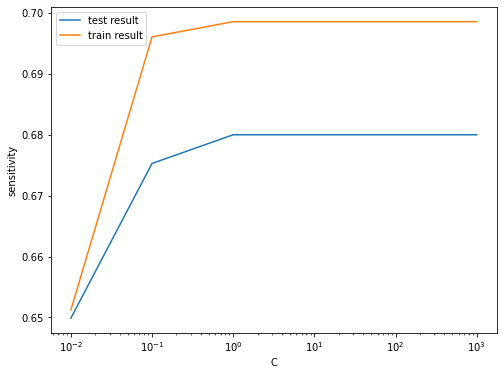

----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 78.81%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.90      0.70      0.79       396

    accuracy                           1.00    227845
   macro avg       0.95      0.85      0.89    227845
weighted avg       1.00      1.00      1.00    227845

AUC Score: 98.28%


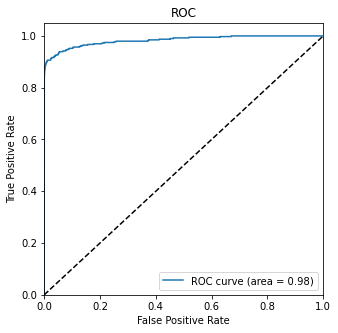

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 67.06%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 96.68%


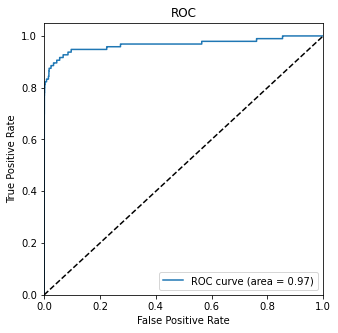

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 78.81%
AUC Score - 98.28% 
Recall Score - 69.95% 
---------
Test Set:
---------
F1 Score - 67.06%
AUC Score - 96.68% 
Recall Score - 59.38% 


In [36]:
log_reg_imb_model, result_train, result_test = model_logistic_regression(X_train, y_train)
overall_results.extend([ ['Imbalanced', 'Logistic regression', 'train', *result_train],
                        ['Imbalanced', 'Logistic regression', 'test', *result_test]
                      ])

#### Decision Tree Model

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best ROC AUC score:  0.7904040404040404
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}
Best Estimator:  DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 83.77%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.83      0.84      0.84       396

    accuracy                           1.00    227845
   macro avg       0.92      0.92      0.92    227845
weighted avg       1.00      1.00      1.00    227845

AUC Score: 95.45%


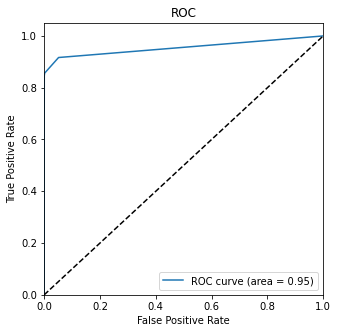

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 75.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.78      0.75        96

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 92.15%


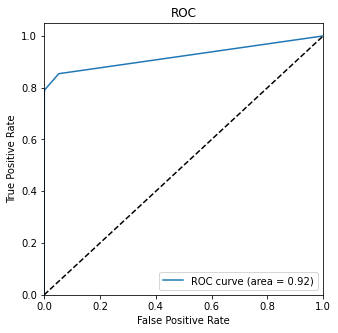

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 83.77%
AUC Score - 95.45% 
Recall Score - 84.09% 
---------
Test Set:
---------
F1 Score - 75.38%
AUC Score - 92.15% 
Recall Score - 78.12% 


In [37]:
dt_imb_model, result_train, result_test = model_dt(X_train, y_train)
overall_results.extend([ ['Imbalanced', 'Decision Tree', 'train', *result_train],
                        ['Imbalanced', 'Decision Tree', 'test', *result_test]
                      ])

#### Random Forest

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best ROC AUC score:  0.7777777777777778
Best hyperparameters:  {'max_depth': 7, 'n_estimators': 15}
Best Estimator:  RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=15,
                       random_state=42)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 88.98%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.98      0.82      0.89       396

    accuracy                           1.00    227845
   macro avg       0.99      0.91      0.94    227845
weighted avg       1.00      1.00      1.00    227845

AUC Score: 97.28%


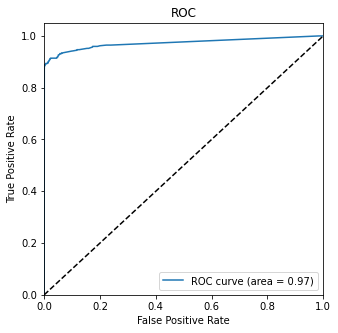

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 75.71%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.83      0.70      0.76        96

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 94.45%


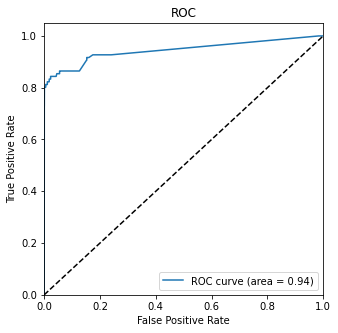

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 88.98%
AUC Score - 97.28% 
Recall Score - 81.57% 
---------
Test Set:
---------
F1 Score - 75.71%
AUC Score - 94.45% 
Recall Score - 69.79% 


In [38]:
rf_imb_model, result_train, result_test = model_randomforest(X_train, y_train)
overall_results.extend([ ['Imbalanced', 'Random Forest', 'train', *result_train],
                        ['Imbalanced', 'Random Forest', 'test', *result_test]
                      ])

#### XGBoost

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.8055555555555557
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.6}
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=48,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 99.75%
Classification Report: 
               precision    recall  f1-

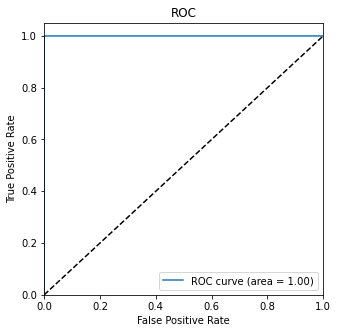

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 82.08%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.92      0.74      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 98.2%


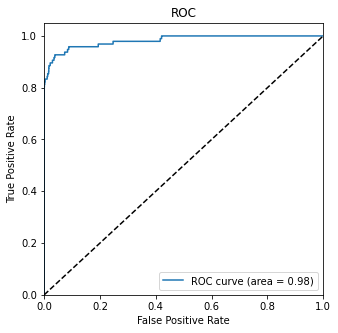

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 99.75%
AUC Score - 100.0% 
Recall Score - 99.49% 
---------
Test Set:
---------
F1 Score - 82.08%
AUC Score - 98.2% 
Recall Score - 73.96% 


In [39]:
xgb_imb_model, result_train, result_test = model_xgboost(X_train, y_train)

overall_results.extend([ ['Imbalanced', 'XGBoost', 'train', *result_train],
                        ['Imbalanced', 'XGBoost', 'test', *result_test]
                      ])

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [40]:
clf = xgb_imb_model

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


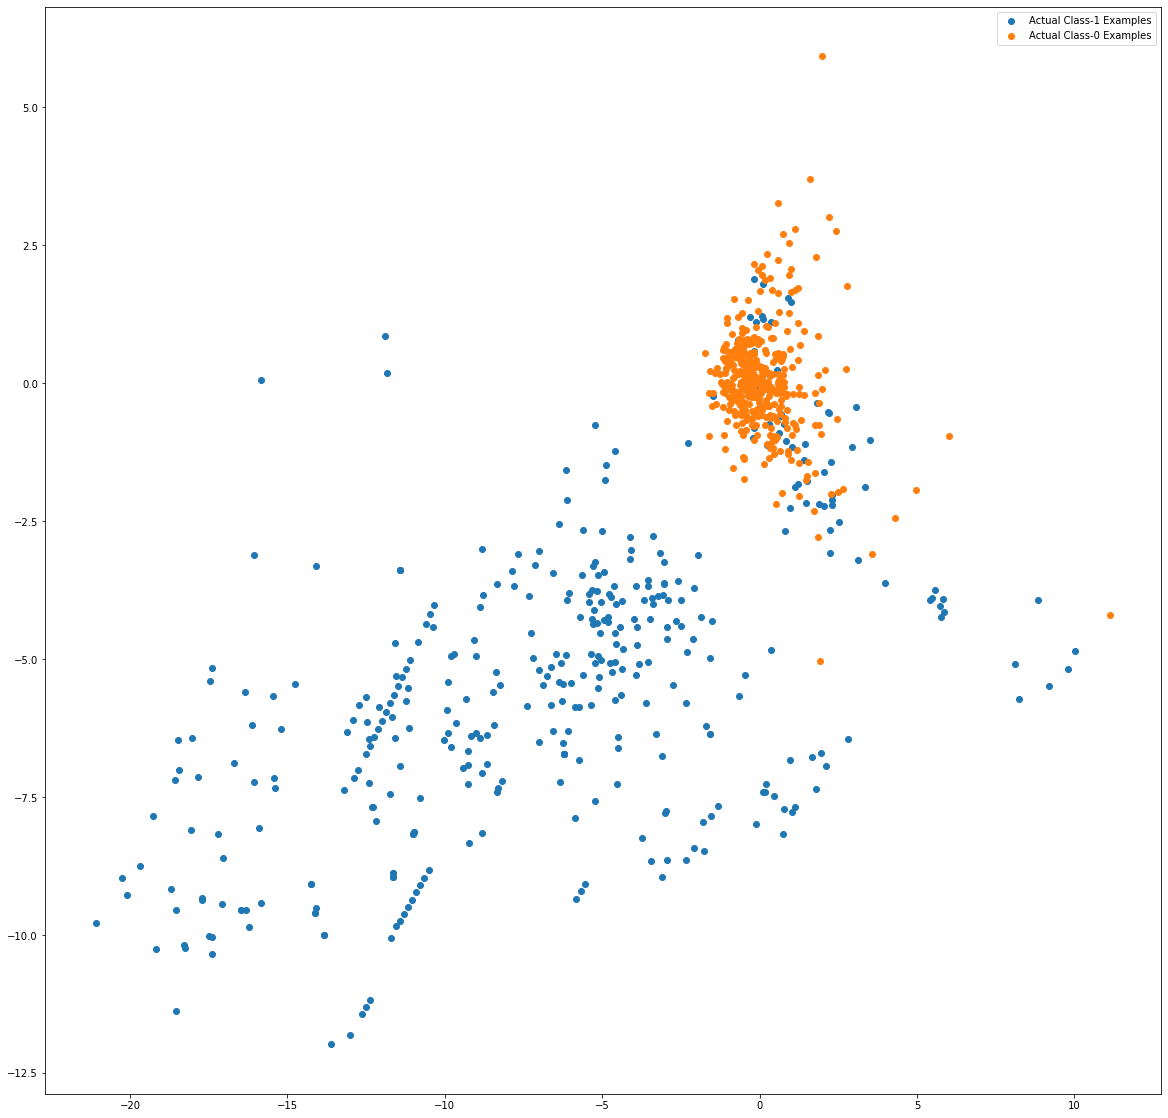

In [41]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [42]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_over))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Model Building with Balanced Dataset (Random Oversampling)

#### Logistic Regression Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9240126667194495
Best hyperparameters:  {'C': 0.01}


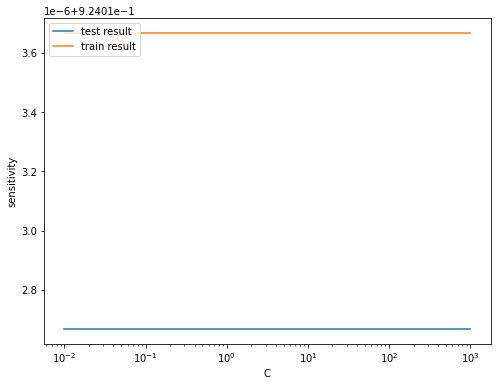

----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 94.94%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

AUC Score: 98.87%


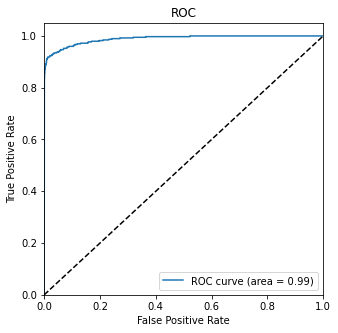

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 11.31%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC Score: 97.0%


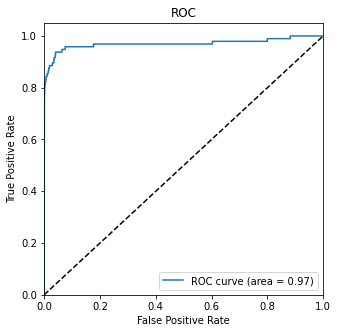

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 94.94%
AUC Score - 98.87% 
Recall Score - 92.4% 
---------
Test Set:
---------
F1 Score - 11.31%
AUC Score - 97.0% 
Recall Score - 88.54% 


In [43]:
log_reg_over_model, result_train, result_test = model_logistic_regression(X_train_over, y_train_over)

overall_results.extend([ ['Random Oversampling', 'Logistic Regression', 'train', *result_train],
                        ['Random Oversampling', 'Logistic Regression', 'test', *result_test]
                      ])

#### Decision Tree Model

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best ROC AUC score:  0.9104018883279554
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best Estimator:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 94.25%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227449
           1       0.98      0.91      0.94    227449

    accuracy                           0.94    454898
   macro avg       0.95      0.94      0.94    454898
weighted avg       0.95      0.94      0.94    454898

AUC Score: 97.0%


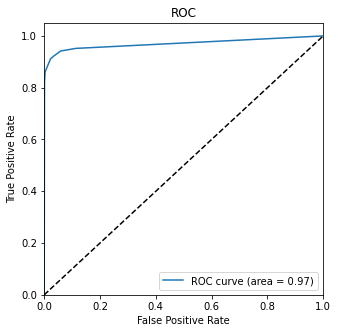

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 10.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.84      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962

AUC Score: 94.69%


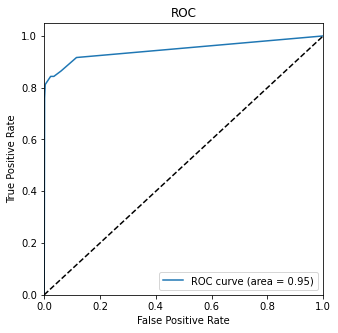

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 94.25%
AUC Score - 97.0% 
Recall Score - 91.17% 
---------
Test Set:
---------
F1 Score - 10.88%
AUC Score - 94.69% 
Recall Score - 84.38% 


In [44]:
dt_over_model, result_train, result_test = model_dt(X_train_over, y_train_over)

overall_results.extend([ ['Random Oversampling', 'Decision Tree', 'train', *result_train],
                        ['Random Oversampling', 'Decision Tree', 'test', *result_test]
                      ])

#### Random Forest

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best ROC AUC score:  0.9817849493947076
Best hyperparameters:  {'max_depth': 9, 'n_estimators': 5}
Best Estimator:  RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=5,
                       random_state=42)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 98.36%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    227449
           1       1.00      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898

AUC Score: 99.95%


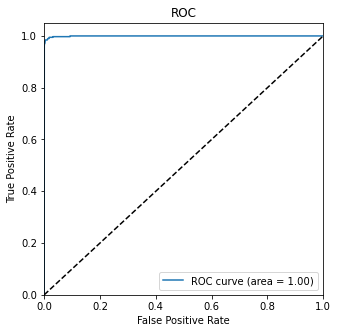

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 52.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.40      0.76      0.52        96

    accuracy                           1.00     56962
   macro avg       0.70      0.88      0.76     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 91.93%


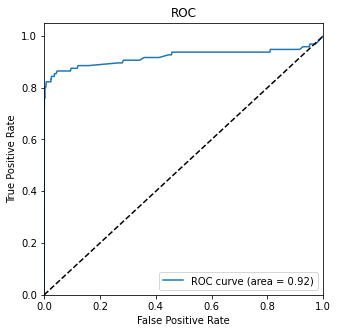

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 98.36%
AUC Score - 99.95% 
Recall Score - 96.91% 
---------
Test Set:
---------
F1 Score - 52.33%
AUC Score - 91.93% 
Recall Score - 76.04% 


In [45]:
rf_over_model, result_train, result_test = model_randomforest(X_train_over, y_train_over)
overall_results.extend([ ['Random Oversampling', 'Random Forest', 'train', *result_train],
                        ['Random Oversampling', 'Random Forest', 'test', *result_test]
                      ])

#### XGBoost Model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  1.0
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.3}
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=48,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

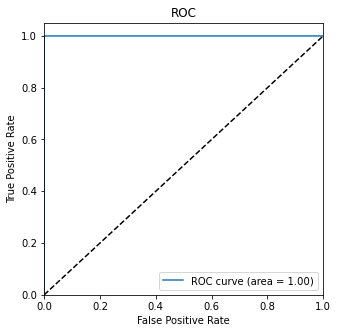

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 80.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.79      0.80        96

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 97.78%


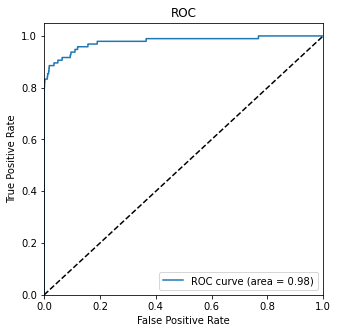

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 100.0%
AUC Score - 100.0% 
Recall Score - 100.0% 
---------
Test Set:
---------
F1 Score - 80.0%
AUC Score - 97.78% 
Recall Score - 79.17% 


In [46]:
xgb_over_model, result_train, result_test = model_xgboost(X_train_over, y_train_over)

overall_results.extend([ ['Random Oversampling', 'XGBoost', 'train', *result_train],
                        ['Random Oversampling', 'XGBoost', 'test', *result_test]
                      ])

### SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE 

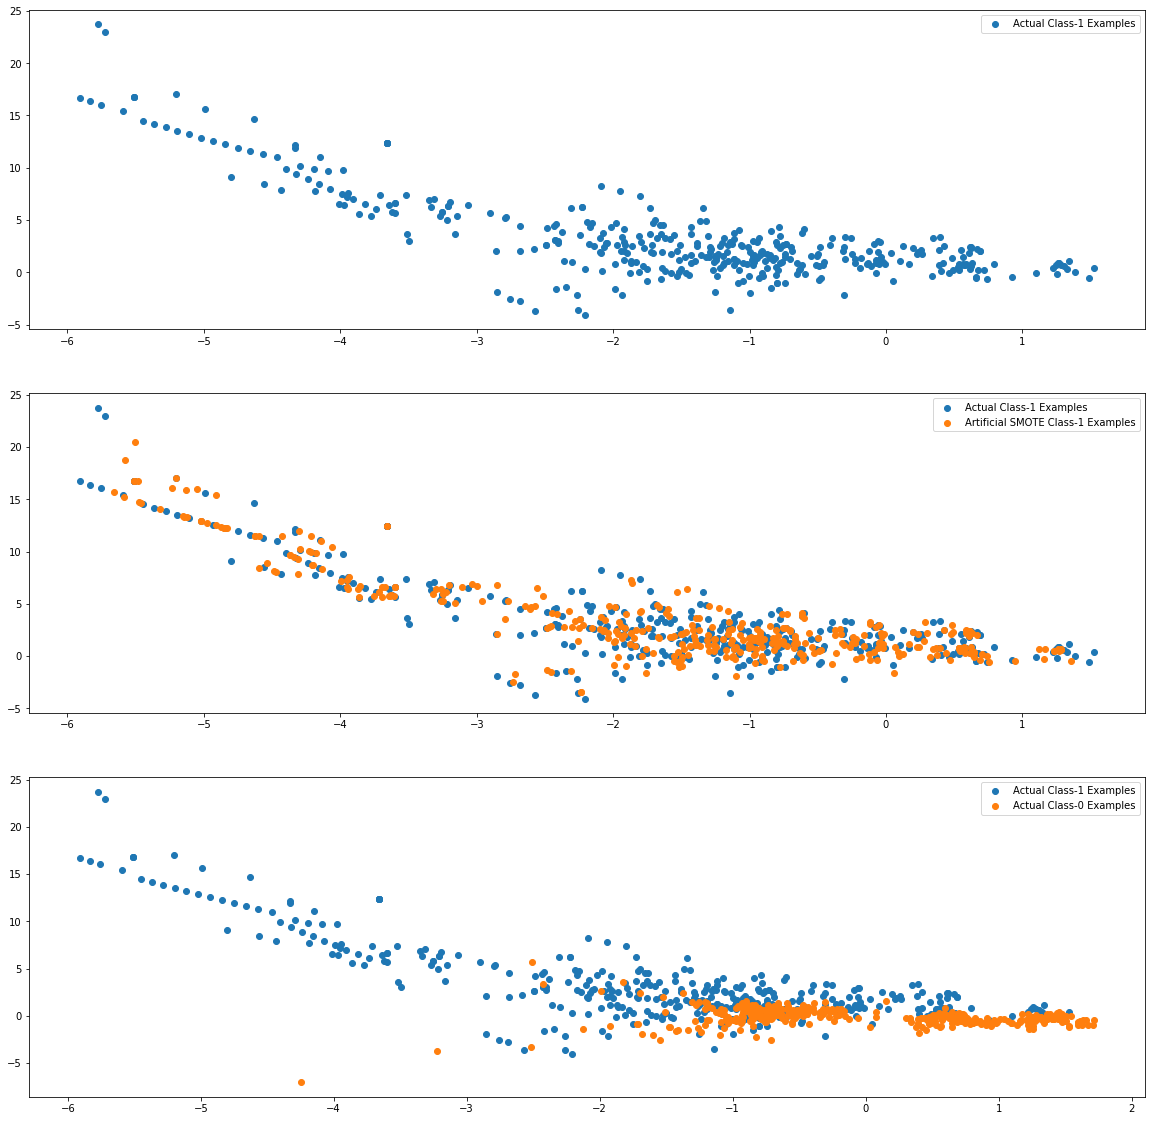

In [47]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model Building with Balanced Dataset (SMOTE)

#### Linear Regression Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9209236722289733
Best hyperparameters:  {'C': 10}


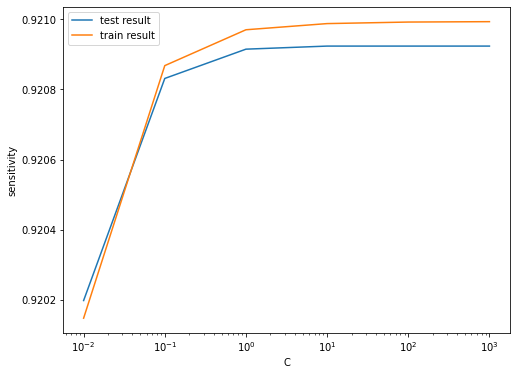

----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 94.69%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898

AUC Score: 98.99%


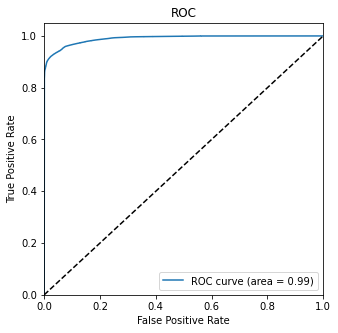

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 10.66%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC Score: 96.79%


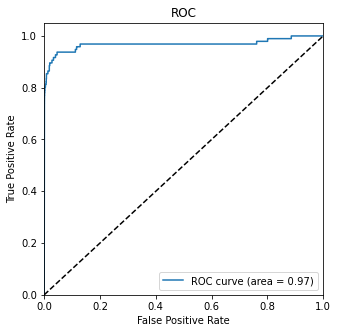

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 94.69%
AUC Score - 98.99% 
Recall Score - 92.09% 
---------
Test Set:
---------
F1 Score - 10.66%
AUC Score - 96.79% 
Recall Score - 89.58% 


In [48]:
log_reg_smote_model, result_train, result_test = model_logistic_regression(X_train_smote, y_train_smote)

overall_results.extend([ ['SMOTE', 'Logistic regression', 'train', *result_train],
                        ['SMOTE', 'Logistic regression', 'test', *result_test]
                      ])

#### Decision Tree Model

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best ROC AUC score:  0.9104018739464326
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best Estimator:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 94.08%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94    227449
           1       0.97      0.92      0.94    227449

    accuracy                           0.94    454898
   macro avg       0.94      0.94      0.94    454898
weighted avg       0.94      0.94      0.94    454898

AUC Score: 96.67%


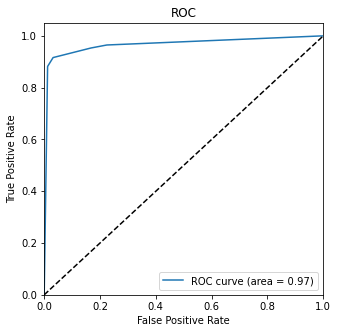

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 7.87%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962

AUC Score: 95.53%


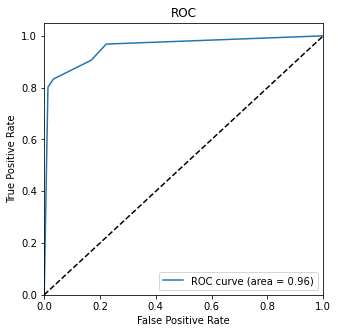

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 94.08%
AUC Score - 96.67% 
Recall Score - 91.65% 
---------
Test Set:
---------
F1 Score - 7.87%
AUC Score - 95.53% 
Recall Score - 83.33% 


In [49]:
dt_smote_model, result_train, result_test = model_dt(X_train_smote, y_train_smote)

overall_results.extend([ ['SMOTE', 'Decision Tree', 'train', *result_train],
                        ['SMOTE', 'Decision Tree', 'test', *result_test]
                      ])

#### Random Forest

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best ROC AUC score:  0.967742216292705
Best hyperparameters:  {'max_depth': 9, 'n_estimators': 15}
Best Estimator:  RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=15,
                       random_state=42)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 98.06%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    227449
           1       1.00      0.96      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898

AUC Score: 99.93%


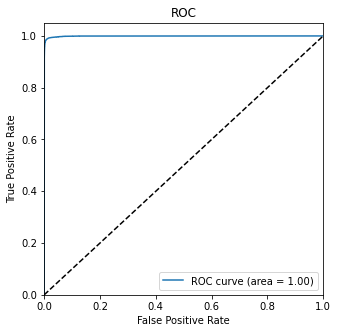

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 46.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.33      0.78      0.47        96

    accuracy                           1.00     56962
   macro avg       0.67      0.89      0.73     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 97.73%


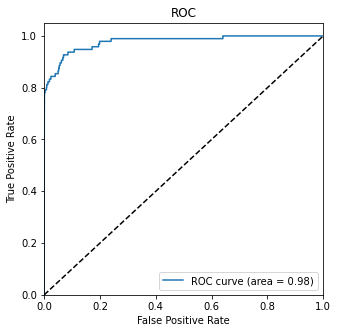

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 98.06%
AUC Score - 99.93% 
Recall Score - 96.36% 
---------
Test Set:
---------
F1 Score - 46.73%
AUC Score - 97.73% 
Recall Score - 78.12% 


In [50]:
rf_smote_model, result_train, result_test = model_randomforest(X_train_smote, y_train_smote)

overall_results.extend([ ['SMOTE', 'Random Forest', 'train', *result_train],
                        ['SMOTE', 'Random Forest', 'test', *result_test]
                      ])

#### XGBoost Model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9999472408619506
Best hyperparameters:  {'learning_rate': 0.6, 'subsample': 0.3}
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=48,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              validate_parameters=1, verbosity=None)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-

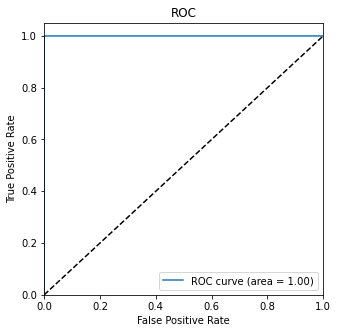

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 74.04%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.80      0.74        96

    accuracy                           1.00     56962
   macro avg       0.84      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 96.04%


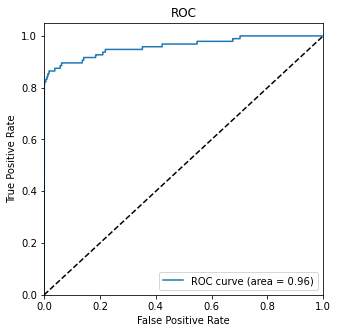

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 100.0%
AUC Score - 100.0% 
Recall Score - 100.0% 
---------
Test Set:
---------
F1 Score - 74.04%
AUC Score - 96.04% 
Recall Score - 80.21% 


In [51]:
xgb_smote_model, result_train, result_test = model_xgboost(X_train_smote, y_train_smote)

overall_results.extend([ ['SMOTE', 'XGBoost', 'train', *result_train],
                        ['SMOTE', 'XGBoost', 'test', *result_test]
                      ])

### ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

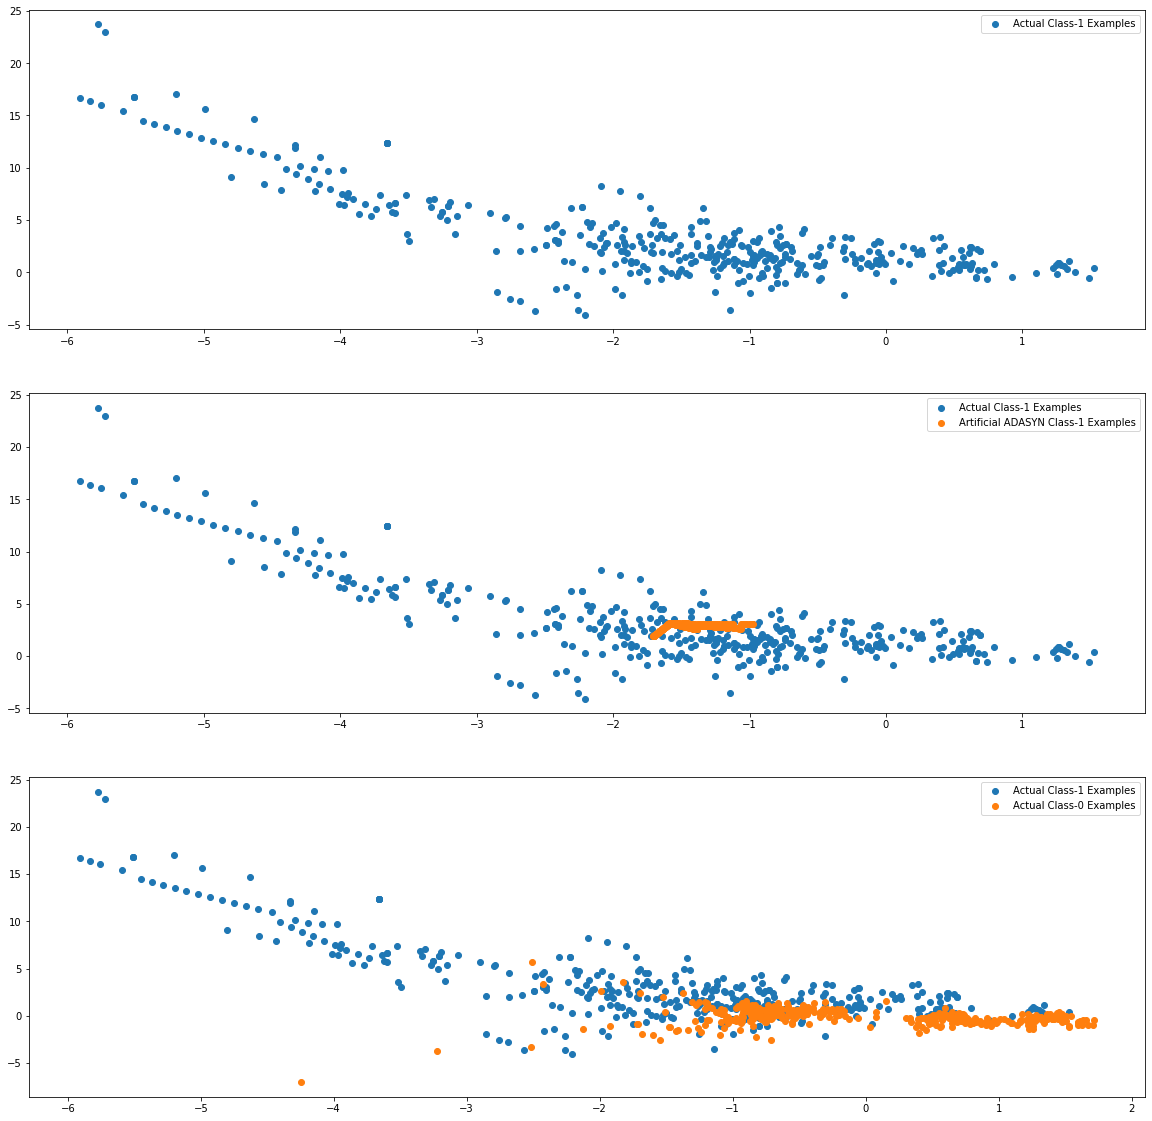

In [52]:
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Model Building with Balanced Dataset (ADASYN)

#### Linear Regression Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.862366818850606
Best hyperparameters:  {'C': 10}


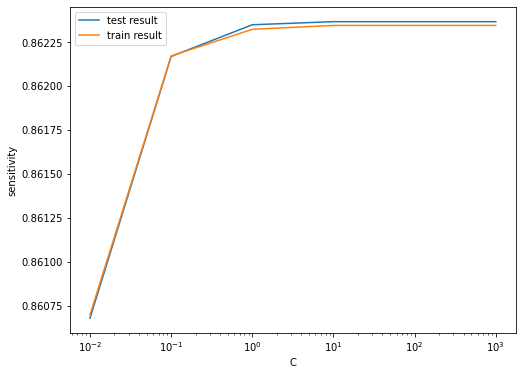

----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 88.41%
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227446

    accuracy                           0.89    454895
   macro avg       0.89      0.89      0.89    454895
weighted avg       0.89      0.89      0.89    454895

AUC Score: 96.4%


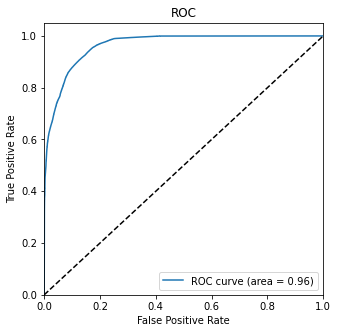

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 3.43%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962

AUC Score: 96.73%


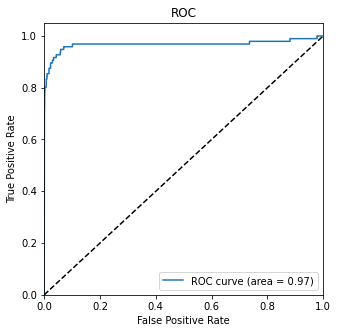

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 88.41%
AUC Score - 96.4% 
Recall Score - 86.23% 
---------
Test Set:
---------
F1 Score - 3.43%
AUC Score - 96.73% 
Recall Score - 95.83% 


In [53]:
log_reg_adasyn_model, result_train, result_test = model_logistic_regression(X_train_adasyn, y_train_adasyn)

overall_results.extend([ ['ADASYN', 'Logistic Regression', 'train', *result_train],
                        ['ADASYN', 'Logistic Regression', 'test', *result_test]
                      ])

#### Decion Tree Model

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best ROC AUC score:  0.7911812034504894
Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best Estimator:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 84.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85    227449
           1       0.86      0.82      0.84    227446

    accuracy                           0.84    454895
   macro avg       0.84      0.84      0.84    454895
weighted avg       0.84      0.84      0.84    454895

AUC Score: 90.17%


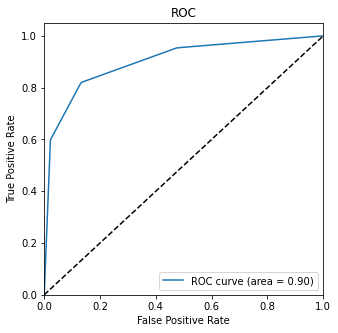

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 2.19%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     56866
           1       0.01      0.90      0.02        96

    accuracy                           0.86     56962
   macro avg       0.51      0.88      0.47     56962
weighted avg       1.00      0.86      0.93     56962

AUC Score: 92.55%


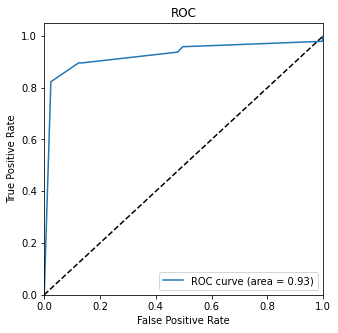

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 84.0%
AUC Score - 90.17% 
Recall Score - 82.05% 
---------
Test Set:
---------
F1 Score - 2.19%
AUC Score - 92.55% 
Recall Score - 89.58% 


In [54]:
dt_adasyn_model, result_train, result_test = model_dt(X_train_adasyn, y_train_adasyn)

overall_results.extend([ ['ADASYN', 'Decision Tree', 'train', *result_train],
                        ['ADASYN', 'Decision Tree', 'test', *result_test]
                      ])

#### Random Forest

Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best ROC AUC score:  0.8027399910308382
Best hyperparameters:  {'max_depth': 7, 'n_estimators': 15}
Best Estimator:  RandomForestClassifier(max_depth=7, max_features='sqrt', n_estimators=15,
                       random_state=42)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 96.92%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97    227449
           1       0.98      0.96      0.97    227446

    accuracy                           0.97    454895
   macro avg       0.97      0.97      0.97    454895
weighted avg       0.97      0.97      0.97    454895

AUC Score: 99.58%


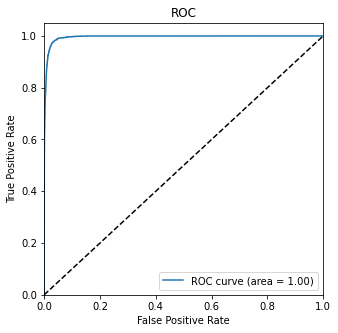

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 10.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.97      0.99     56962

AUC Score: 97.54%


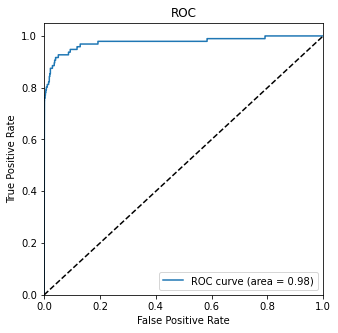

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 96.92%
AUC Score - 99.58% 
Recall Score - 96.23% 
---------
Test Set:
---------
F1 Score - 10.55%
AUC Score - 97.54% 
Recall Score - 87.5% 


In [55]:
rf_adasyn_model, result_train, result_test = model_randomforest(X_train_adasyn, y_train_adasyn)

overall_results.extend([ ['ADASYN', 'Random Forest', 'train', *result_train],
                        ['ADASYN', 'Random Forest', 'test', *result_test]
                      ])

#### XGBoost Model

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9090595387786488
Best hyperparameters:  {'learning_rate': 0.2, 'subsample': 0.9}
Best Estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=48,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)
----------------------------------------
---------- Predict on Train Set ----------
----------------------------------------
F1 Score: 99.98%
Classification Report: 
               precision    recall  f1-

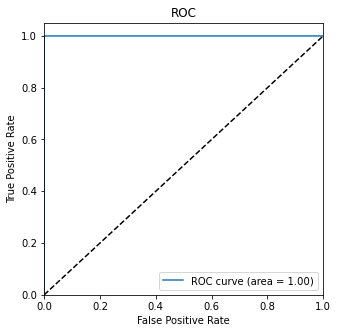

---------------------------------------------
---------- Predict on Test Set ----------
---------------------------------------------
F1 Score: 63.07%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.52      0.79      0.63        96

    accuracy                           1.00     56962
   macro avg       0.76      0.90      0.81     56962
weighted avg       1.00      1.00      1.00     56962

AUC Score: 95.46%


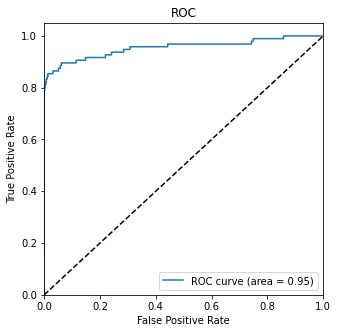

=============== Model Summary ===============
---------
Train Set:
---------
F1 Score - 99.98%
AUC Score - 100.0% 
Recall Score - 100.0% 
---------
Test Set:
---------
F1 Score - 63.07%
AUC Score - 95.46% 
Recall Score - 79.17% 


In [56]:
xgb_adasyn_model, result_train, result_test = model_xgboost(X_train_adasyn, y_train_adasyn)

overall_results.extend([ ['ADASYN', 'XGBoost', 'train', *result_train],
                        ['ADASYN', 'XGBoost', 'test', *result_test]
                      ])

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [57]:
# perform the best oversampling method on X_train & y_train

clf = xgb_adasyn_model
#clf.fit( ) # fit on the balanced dataset
#print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


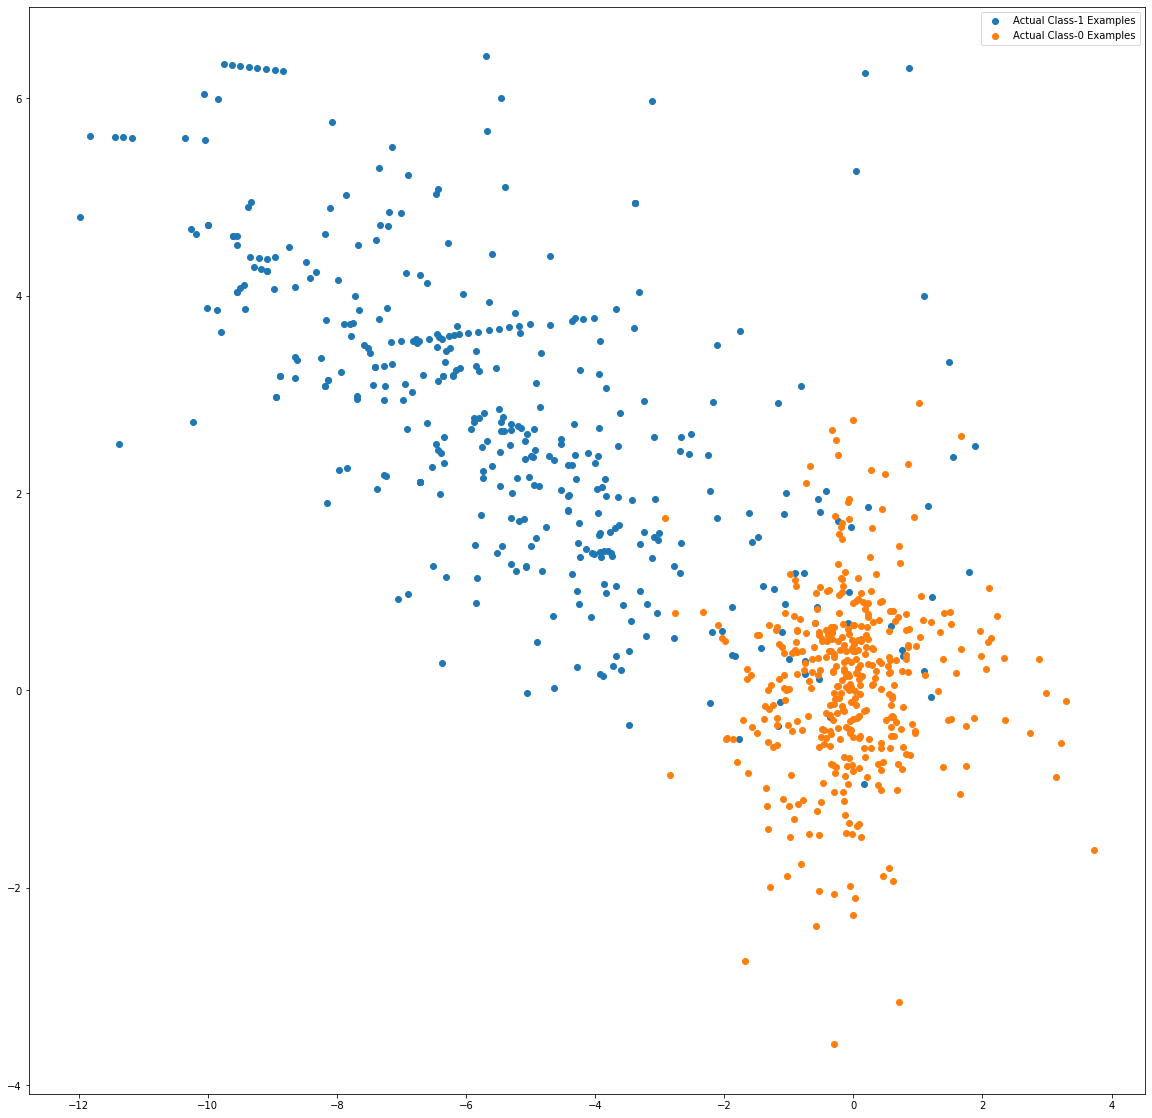

In [58]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Results

In [59]:
df = pd.DataFrame(overall_results, columns=['Data Balancing', 'ML Model', 'Train-Test', 'F1 Score', 'AUC Score', 'Recall Score'])
print(f"\n{'-'*43}\nResults On test Data sorted by Recall Score\n{'-'*43}")
display(df[df['Train-Test']=='test'].drop('Train-Test', axis=1).sort_values('Recall Score', ascending=False))
print(f"\n{'-'*43}\nResults On test Data sorted by F1 Score\n{'-'*43}")
display(df[df['Train-Test']=='test'].drop('Train-Test', axis=1).sort_values('F1 Score', ascending=False))


-------------------------------------------
Results On test Data sorted by Recall Score
-------------------------------------------


,Data Balancing,ML Model,F1 Score,AUC Score,Recall Score
25,ADASYN,Logistic Regression,0.034284,0.967296,0.958333
17,SMOTE,Logistic regression,0.106634,0.967913,0.895833
27,ADASYN,Decision Tree,0.021869,0.925535,0.895833
9,Random Oversampling,Logistic Regression,0.113107,0.969994,0.885417
29,ADASYN,Random Forest,0.105461,0.975406,0.875000
11,Random Oversampling,Decision Tree,0.108798,0.946865,0.843750
19,SMOTE,Decision Tree,0.078701,0.955328,0.833333
23,SMOTE,XGBoost,0.740385,0.960370,0.802083
15,Random Oversampling,XGBoost,0.800000,0.977808,0.791667
31,ADASYN,XGBoost,0.630705,0.954627,0.791667



-------------------------------------------
Results On test Data sorted by F1 Score
-------------------------------------------


,Data Balancing,ML Model,F1 Score,AUC Score,Recall Score
7,Imbalanced,XGBoost,0.820809,0.981999,0.739583
15,Random Oversampling,XGBoost,0.800000,0.977808,0.791667
5,Imbalanced,Random Forest,0.757062,0.944539,0.697917
3,Imbalanced,Decision Tree,0.753769,0.921453,0.781250
23,SMOTE,XGBoost,0.740385,0.960370,0.802083
1,Imbalanced,Logistic regression,0.670588,0.966815,0.593750
31,ADASYN,XGBoost,0.630705,0.954627,0.791667
13,Random Oversampling,Random Forest,0.523297,0.919280,0.760417
21,SMOTE,Random Forest,0.467290,0.977306,0.781250
9,Random Oversampling,Logistic Regression,0.113107,0.969994,0.885417


# Conclusion

## Which Model To Select?

As it is more important that every case of Fraud is detected, and a few more false positives is ok, the best model for this situation should have a high Recall. Of course, Precision and AUC Score should not be too low either. If precision is too low, the number of False Positives would be very high making the job of investigation more difficult.

So the best model for Credit Card Fraud Detection should have the following characteristics :-

- High recall
- Medium to high AUC Score
- Medium to High F1 Score

### Based on the above criteria, the best models are :-

- **XGBoost with SMOTE**

  - Recall   : 80%
  - F1 Score : 74%
  - AUC Score: 96%
  - This model has a reasonably High Recall and F1 Score and aHigh AUC Score.
  - This is the best Model with a good balance of results.


- **Linear Regression with ADASYN** 
  - Highest recall among all Models - 95.8%
  - The AUC Score is good at 96.7%.
  - However, F1 Score is very low at 3%. 
  - So if large number of False Positives is not a problem, this would be the best model for detecting Fraud.